In [2]:
!pip install pygame

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 362.1 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [1]:
import pygame
import numpy as np
import matplotlib.pyplot as plt

pygame 2.5.2 (SDL 2.28.3, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


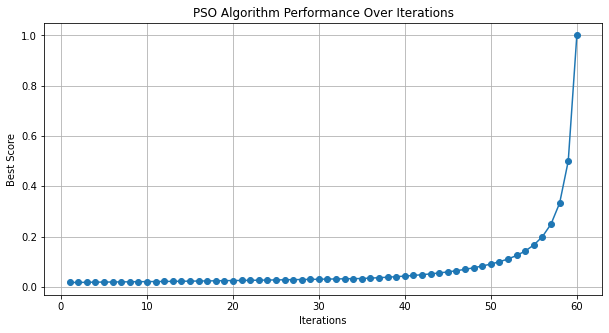

In [9]:
import pygame
import random
import numpy as np

# Initialize Pygame
pygame.init()

# Constants
WIDTH, HEIGHT = 800, 600
FPS = 60
NPC_COUNT = 5

# Colors
WHITE = (255, 255, 255)
YELLOW = (255, 255, 0)
RED = (255, 0, 0)

# Initialize the screen
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Pac-Man with PSO")


SWARM_SIZE = NPC_COUNT
MAX_ITERATIONS = 100
C1 = 2.0
C2 = 2.0
INERTIA_WEIGHT = 0.5
MAX_SPEED = 5.0

class Particle:
    def __init__(self):
        self.position = np.array([random.randint(0, WIDTH), random.randint(0, HEIGHT)])
        self.velocity = np.array([random.uniform(-MAX_SPEED, MAX_SPEED), random.uniform(-MAX_SPEED, MAX_SPEED)])
        self.best_position = self.position.copy()
        self.best_score = float('-inf')

def distance(p1, p2):
    return np.linalg.norm(p1 - p2)

def fitness(pacman_pos, ghost_pos):
    dist = distance(pacman_pos, ghost_pos)
    if dist == 0:
        return float('inf')  
    return 1 / dist


def update_position(particle):
    particle.position = (particle.position + particle.velocity).astype(int)
   
    particle.position = np.clip(particle.position, [0, 0], [WIDTH, HEIGHT])

def plot_results(iterations, scores):
    plt.figure(figsize=(10, 5))
    plt.plot(iterations, scores, marker='o')
    plt.title('PSO Algorithm Performance Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Best Score')
    plt.grid(True)
    plt.show()

# ... (previous code)

def main():
    clock = pygame.time.Clock()

    # Create Pac-Man and Ghosts
    pacman_pos = np.array([WIDTH // 2, HEIGHT // 2])
    ghosts = [Particle() for _ in range(NPC_COUNT)]

    # Variables for plotting
    iteration = 0
    best_scores = []

    # Main loop
    running = True
    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

        # Particle Swarm Optimization
        for ghost in ghosts:
            score = fitness(pacman_pos, ghost.position)
            if score > ghost.best_score:
                ghost.best_score = score
                ghost.best_position = ghost.position.copy()

        # Track the best score for plotting
        best_ghost = max(ghosts, key=lambda x: x.best_score)
        best_scores.append(best_ghost.best_score)

        for ghost in ghosts:
            r1, r2 = np.random.rand(2)
            new_velocity = (INERTIA_WEIGHT * ghost.velocity +
                            C1 * r1 * (ghost.best_position - ghost.position) +
                            C2 * r2 * (best_ghost.best_position - ghost.position))

            # Limit the speed of the particles
            new_velocity = np.clip(new_velocity, -MAX_SPEED, MAX_SPEED)

            ghost.velocity = new_velocity
            update_position(ghost)

        # Drawing
        screen.fill(WHITE)
        pygame.draw.circle(screen, YELLOW, pacman_pos.astype(int), 20)
        for ghost in ghosts:
            pygame.draw.circle(screen, RED, ghost.position.astype(int), 20)

        pygame.display.flip()

        clock.tick(FPS)
        iteration += 1
        if iteration >= MAX_ITERATIONS:
            running = False

    # Plot the results after the simulation
    plot_results(range(1, iteration + 1), best_scores)

    pygame.quit()

if __name__ == "__main__":
    main()



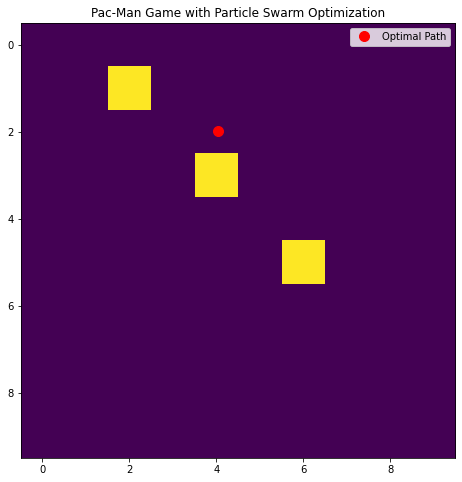

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the Pac-Man game
GRID_SIZE = 10
NUM_PARTICLES = 30
NUM_ITERATIONS = 50

# Initialize Pac-Man game grid
grid = np.zeros((GRID_SIZE, GRID_SIZE))
pellet_positions = [(1, 2), (3, 4), (5, 6)]  # Example pellet positions
for pellet in pellet_positions:
    grid[pellet] = 1

# Particle Swarm Optimization (PSO) algorithm
class Particle:
    def __init__(self):
        self.position = np.random.rand(2) * GRID_SIZE
        self.velocity = np.random.rand(2)
        self.best_position = self.position.copy()
        self.best_fitness = self.calculate_fitness()

    def calculate_fitness(self):
        # Evaluate fitness (distance to the pellets)
        distances = [np.linalg.norm(self.position - np.array(pellet)) for pellet in pellet_positions]
        return sum(distances)

def pso_algorithm():
    particles = [Particle() for _ in range(NUM_PARTICLES)]
    global_best_position = min(particles, key=lambda p: p.best_fitness).position.copy()

    for iteration in range(NUM_ITERATIONS):
        for particle in particles:
            # Update velocity and position
            inertia_weight = 0.5
            cognitive_weight = 1.5
            social_weight = 1.5
            r1, r2 = np.random.rand(2)
            particle.velocity = (inertia_weight * particle.velocity +
                                 cognitive_weight * r1 * (particle.best_position - particle.position) +
                                 social_weight * r2 * (global_best_position - particle.position))
            particle.position = np.clip(particle.position + particle.velocity, 0, GRID_SIZE)

            # Update personal best
            current_fitness = particle.calculate_fitness()
            if current_fitness < particle.best_fitness:
                particle.best_fitness = current_fitness
                particle.best_position = particle.position.copy()

            # Update global best
            if current_fitness < particle.calculate_fitness():
                global_best_position = particle.position.copy()

    return global_best_position

# Run PSO algorithm and get the optimal path
optimal_path = pso_algorithm()

# Plot the results
plt.figure(figsize=(8, 8))
plt.imshow(grid, cmap='viridis', interpolation='nearest', origin='upper')

# Plot optimal path
plt.plot(optimal_path[1], optimal_path[0], 'ro', markersize=10, label='Optimal Path')

plt.title('Pac-Man Game with Particle Swarm Optimization')
plt.legend()
plt.show()


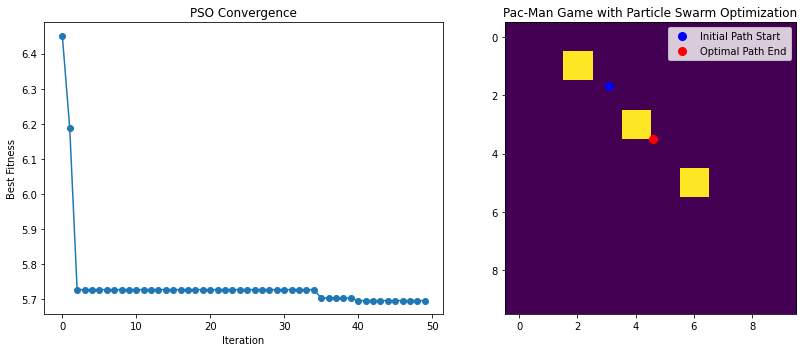

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the Pac-Man game
GRID_SIZE = 10
NUM_PARTICLES = 30
NUM_ITERATIONS = 50

grid = np.zeros((GRID_SIZE, GRID_SIZE))
pellet_positions = [(1, 2), (3, 4), (5, 6)] 
for pellet in pellet_positions:
    grid[pellet] = 1

class Particle:
    def __init__(self):
        self.position = np.random.rand(2) * GRID_SIZE
        self.velocity = np.random.rand(2)
        self.best_position = self.position.copy()
        self.best_fitness = self.calculate_fitness()

    def calculate_fitness(self):
    
        distances = [np.linalg.norm(self.position - np.array(pellet)) for pellet in pellet_positions]
        return sum(distances)

# Initialize particles
particles = [Particle() for _ in range(NUM_PARTICLES)]

def pso_algorithm():
    particles = [Particle() for _ in range(NUM_PARTICLES)]
    global_best_position = min(particles, key=lambda p: p.best_fitness).position.copy()

    iteration_values = []
    best_fitness_values = []

    for iteration in range(NUM_ITERATIONS):
        iteration_values.append(iteration)
        best_fitness_values.append(min(p.best_fitness for p in particles))

        for particle in particles:
     
            inertia_weight = 0.5
            cognitive_weight = 1.5
            social_weight = 1.5
            r1, r2 = np.random.rand(2)
            particle.velocity = (inertia_weight * particle.velocity +
                                 cognitive_weight * r1 * (particle.best_position - particle.position) +
                                 social_weight * r2 * (global_best_position - particle.position))
            particle.position = np.clip(particle.position + particle.velocity, 0, GRID_SIZE)

       
            current_fitness = particle.calculate_fitness()
            if current_fitness < particle.best_fitness:
                particle.best_fitness = current_fitness
                particle.best_position = particle.position.copy()


            if current_fitness < particle.calculate_fitness():
                global_best_position = particle.position.copy()

    return global_best_position, iteration_values, best_fitness_values

optimal_path, iterations, fitness_values = pso_algorithm()


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(iterations, fitness_values, marker='o')
plt.title('PSO Convergence')
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')

# Plot the Pac-Man game grid
plt.subplot(1, 2, 2)
plt.imshow(grid, cmap='viridis', interpolation='nearest', origin='upper')


initial_position = [particle.position for particle in particles][0]
plt.plot(initial_position[1], initial_position[0], 'bo', markersize=8, label='Initial Path Start')
plt.plot(optimal_path[1], optimal_path[0], 'ro', markersize=8, label='Optimal Path End')

plt.title('Pac-Man Game with Particle Swarm Optimization')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
!pip install pyswarm


  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=a977c06175889dcc9829c0f6442f753f168b9e326b447ac2e9c09155036d0948
  Stored in directory: /Users/rashinfarahani/Library/Caches/pip/wheels/ff/d2/b7/80118e5698de2bd0b8d1b3397abf7fdfc45c15ffc454b52145
Successfully built pyswarm

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


Stopping search: Swarm best objective change less than 1e-08
The optimal solution is:  [1.61506291e-05 1.16726351e-04]
The value of the objective function at the optimal solution is:  1.388588391235493e-08


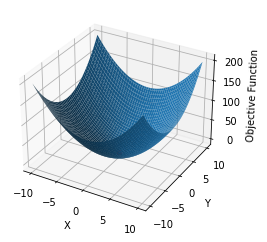

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from pyswarm import pso


def objective_function(x):
    return x[0]**2 + x[1]**2


lb = [-10, -10]
ub = [10, 10]


xopt, fopt = pso(objective_function, lb, ub)

# Print the results
print("The optimal solution is: ", xopt)
print("The value of the objective function at the optimal solution is: ", fopt)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
ax.plot_surface(X, Y, Z)
ax.scatter(xopt[0], xopt[1], fopt, color='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Objective Function')
plt.show()


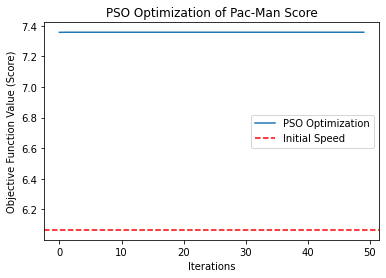

Optimal Pac-Man Speed: 10.000000017245403
Optimal Pac-Man Score: 7.357588823428848


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(speed):
    efficiency = 2 * np.exp(-0.1 * speed)
    return speed * efficiency


def particle_swarm_optimization(objective_function, num_particles=10, num_iterations=50):
    # Initialize particles
    particles = np.random.uniform(low=1, high=10, size=num_particles)
    particle_best = particles.copy()
    global_best_index = np.argmax([objective_function(p) for p in particles])
    global_best = particles[global_best_index]

    inertia_weight = 0.5
    personal_weight = 2.0
    global_weight = 2.0

    global_best_values = []

  
    for iteration in range(num_iterations):
        for i in range(num_particles):
           
            inertia_term = inertia_weight * (particles[i] - particle_best[i])
            personal_term = personal_weight * np.random.random() * (particle_best[i] - particles[i])
            global_term = global_weight * np.random.random() * (global_best - particles[i])

            particles[i] = particles[i] + inertia_term + personal_term + global_term


            if objective_function(particles[i]) > objective_function(particle_best[i]):
                particle_best[i] = particles[i]


            if objective_function(particles[i]) > objective_function(global_best):
                global_best = particles[i]
                global_best_index = i

        global_best_values.append(objective_function(global_best))

    return global_best, global_best_values


best_speed, score_history = particle_swarm_optimization(objective_function)

plt.plot(score_history, label="PSO Optimization")
plt.axhline(y=objective_function(5), color='r', linestyle='--', label="Initial Speed")
plt.title("PSO Optimization of Pac-Man Score")
plt.xlabel("Iterations")
plt.ylabel("Objective Function Value (Score)")
plt.legend()
plt.show()

print("Optimal Pac-Man Speed:", best_speed)
print("Optimal Pac-Man Score:", objective_function(best_speed))

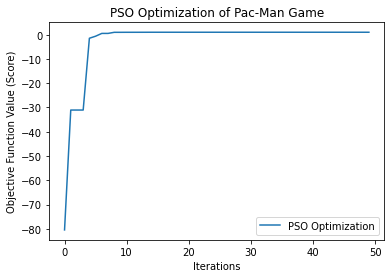

Optimal Pac-Man Position: -1.2288897495089784e-18
Optimal Pac-Man Score: 1.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt


num_dots = 10
num_ghosts = 2
game_board_size = 10


def objective_function(position):
  
    score = num_dots - np.sum(np.abs(game_board - position))
    for ghost in ghosts:
        if np.array_equal(position, ghost):
            score -= 100 
    return score


game_board = np.zeros((game_board_size, game_board_size))
dots = np.random.choice(game_board_size, (num_dots, 2))
ghosts = np.random.choice(game_board_size, (num_ghosts, 2))
for dot in dots:
    game_board[dot[0], dot[1]] = 1


best_position, score_history = particle_swarm_optimization(objective_function)


plt.plot(score_history, label="PSO Optimization")
plt.title("PSO Optimization of Pac-Man Game")
plt.xlabel("Iterations")
plt.ylabel("Objective Function Value (Score)")
plt.legend()
plt.show()

print("Optimal Pac-Man Position:", best_position)
print("Optimal Pac-Man Score:", objective_function(best_position))


In [6]:
import numpy as np
import matplotlib.pyplot as plt

num_dots = 10
num_ghosts = 2
game_board_size = 10

game_board = np.zeros((game_board_size, game_board_size))
dots = np.random.choice(game_board_size, (num_dots, 2))
ghosts = np.random.choice(game_board_size, (num_ghosts, 2))
for dot in dots:
    game_board[dot[0], dot[1]] = 1

# Define Pac-Man's movements
def move_pacman(pacman_position):
    # Pac-Man moves randomly but stays within the game board
    new_position = pacman_position + np.random.choice([-1, 0, 1], 2)
    new_position = np.clip(new_position, 0, game_board_size - 1)
    return new_position

# Run the game
pacman_position = np.array([0, 0])
score = 0
for _ in range(100):  # Play for 100 turns
    pacman_position = move_pacman(pacman_position)
    if game_board[pacman_position[0], pacman_position[1]] == 1:
        score += 1  # Pac-Man eats a dot
    for ghost in ghosts:
        if np.array_equal(pacman_position, ghost):
            score -= 100  # Pac-Man is caught by a ghost

print("Final Score:", score)


Final Score: -392
